# DRUG PRESCRITION PREDICTION USING DESICION TREES 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
path= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'

data = pd.read_csv(path)
df = data.copy()
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


### Data analysis

In [5]:
df.shape

(200, 6)

checking for missing values 

In [12]:
missing_values = df.isnull()

columns = df.columns

for column in columns:
    print(missing_values[column].value_counts())

Age
False    200
Name: count, dtype: int64
Sex
False    200
Name: count, dtype: int64
BP
False    200
Name: count, dtype: int64
Cholesterol
False    200
Name: count, dtype: int64
Na_to_K
False    200
Name: count, dtype: int64
Drug
False    200
Name: count, dtype: int64


we can conclude that there are no missing values 

In [13]:
for column in columns:
    print(df[column].value_counts())

Age
47    8
23    7
28    7
49    7
39    6
32    6
50    5
37    5
58    5
60    5
22    5
34    4
72    4
51    4
42    4
26    4
24    4
74    4
67    4
68    4
61    4
56    4
20    4
36    4
45    4
41    4
31    4
43    4
65    4
57    4
53    3
40    3
70    3
59    3
16    3
38    3
15    3
69    3
35    3
18    3
64    3
52    2
55    2
62    2
19    2
29    2
66    2
73    2
46    2
48    2
54    1
17    1
33    1
63    1
30    1
21    1
25    1
Name: count, dtype: int64
Sex
M    104
F     96
Name: count, dtype: int64
BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64
Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64
Na_to_K
12.006    2
18.295    2
25.355    1
11.939    1
16.347    1
         ..
24.658    1
24.276    1
13.967    1
19.675    1
11.349    1
Name: count, Length: 198, dtype: int64
Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


### Data reprocessing(Transformation)

In [38]:
columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [39]:
from sklearn.preprocessing import LabelEncoder

x = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
sex_LE = LabelEncoder()
x[:,1] = sex_LE.fit_transform(x[:,1])

BP_LE = LabelEncoder()
x[:,2] = BP_LE.fit_transform(x[:,2])

le_Chol = LabelEncoder()
x[:,3] = le_Chol.fit_transform(x[:,3])


In [40]:
y = df.iloc[:,-1].values

### splitting the dataset

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2 , random_state=4)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(160, 5) (160,)
(40, 5) (40,)


In [42]:
from sklearn.tree import  DecisionTreeClassifier
import sklearn.tree as Tree

model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
model

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [43]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [46]:
prediction = model.predict(x_test)
dataaframe = {
    'Drug_values': y_test,
    'predicted_drug':prediction,
}

df2 = pd.DataFrame(dataaframe)

In [47]:
df2

,Drug_values,predicted_drug
0,drugY,drugY
1,drugY,drugY
2,drugY,drugY
3,drugY,drugY
4,drugC,drugC
5,drugX,drugX
6,drugY,drugY
7,drugY,drugY
8,drugY,drugY
9,drugA,drugA


In [52]:
from sklearn.metrics import confusion_matrix,accuracy_score
conf_matrix = confusion_matrix(y_test,prediction)
print(conf_matrix)

[[ 6  0  0  0  0]
 [ 1  2  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 10  1]
 [ 0  0  0  0 15]]


## Evaluation

In [55]:
print("DecisionTrees's Accuracy: ", accuracy_score(y_test, prediction))

DecisionTrees's Accuracy:  0.95


### Visualisatiion

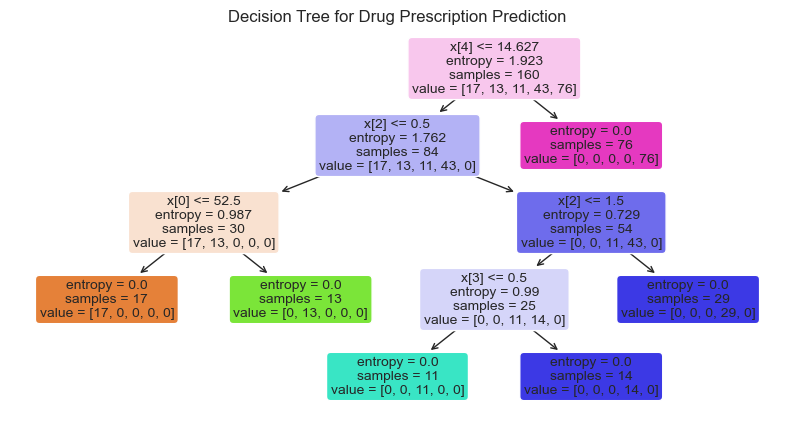

In [66]:
plt.figure(figsize = (10,5))
Tree.plot_tree(model,filled = True,rounded = True,fontsize =10)
plt.title('Decision Tree for Drug Prescription Prediction')
plt.savefig('decision_Tree')
plt.show()